### Importación de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



obtencion de datos de precio de las tiendas

In [6]:

suma = tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

Creacion de :


1.   lista de tiendas
2.   lista  de los totales de cada tienda
3.   muestra la tienda y su total





In [7]:
lista = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
ingreso = [suma, suma2, suma3, suma4]

for i in range(len(lista)):
  print('Ingreso total de la', lista[i], 'es: $',ingreso[i])

Ingreso total de la tienda 1 es: $ 1150880400.0
Ingreso total de la tienda 2 es: $ 1116343500.0
Ingreso total de la tienda 3 es: $ 1098019600.0
Ingreso total de la tienda 4 es: $ 1038375700.0


visualizacion de la informcion a travez de grafico

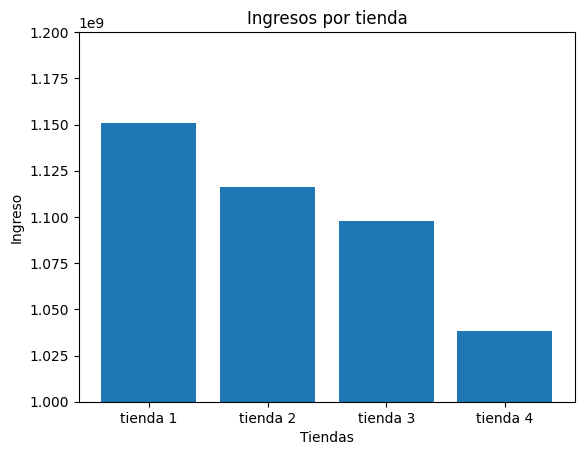

In [8]:
import matplotlib.pyplot

matplotlib.pyplot.title('Ingresos por tienda')
matplotlib.pyplot.ylabel('Ingreso')
matplotlib.pyplot.xlabel('Tiendas')
matplotlib.pyplot.ylim(1000000000, 1200000000)
matplotlib.pyplot.bar(lista, ingreso)
matplotlib.pyplot.show()

segun este analisis el ranquing de facturacion de cada tienda es :



1.   Facturacion de la tienda 1 es: $ 1150880400

2.   Facturacion de la tienda 2 es: $ 1116343500

3.   Facturacion de la tienda 3 es: $ 1098019600

4.   Facturacion de la tienda 4 es: $ 1038375700



Segun el analisi de facturacion la tienda con mayor facturacion es la tienda 1 y la con menor facturacion es la tienda 4



# 2. Ventas por categoría

funcion para calcular las ventas por categoria para cada tienda

In [9]:
def ventas_por_categoria(df, nombre_tienda):
    ventas = df.groupby("Categoría del Producto")["Precio"].sum().reset_index()
    ventas.columns = ["Categoría", nombre_tienda]
    return ventas

aplicar el calculo de la funcion a cada tienda

In [10]:
ventas1 = ventas_por_categoria(tienda, "Tienda 1")
ventas2 = ventas_por_categoria(tienda2, "Tienda 2")
ventas3 = ventas_por_categoria(tienda3, "Tienda 3")
ventas4 = ventas_por_categoria(tienda4, "Tienda 4")


unir los resultados de las 4 tiendas para su comparacion

In [11]:
comparacion = ventas1.merge(ventas2, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas3, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas4, on="Categoría", how="outer")
comparacion = comparacion.fillna(0)  # Llenar vacíos con 0





tabla comparativa de las ventas por categoria de cada tienda

In [12]:
comparacion

,Categoría,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
1,Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
2,Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
3,Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
4,Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
5,Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
6,Libros,8784900.0,10091200.0,9498700.0,9321300.0
7,Muebles,187633700.0,176426300.0,201072100.0,192528900.0


generacion de grafico de ventas por categorias

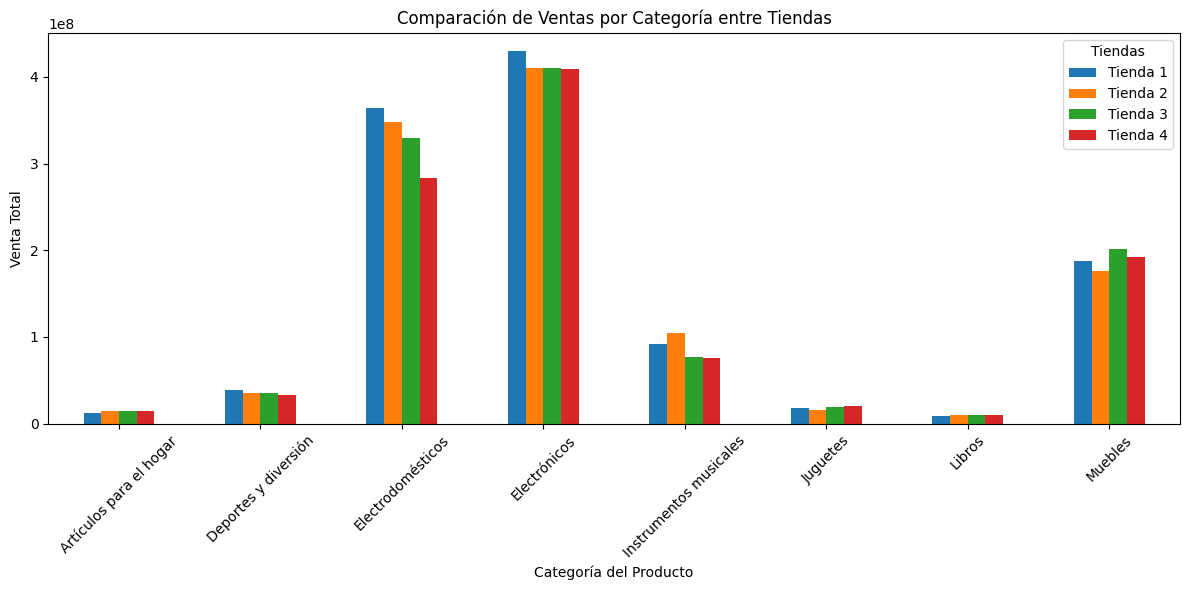

In [13]:
comparacion.set_index("Categoría").plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Venta Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tiendas")
plt.show()

en este analisis se aprecia que para todas las tiendas la categoria que se dispara por sobre las otras es articulos electronicos.

quedando el ranquing de la siguiente forma:

1.   Tienda 1 con $429493500 de ventas

2.   Tienda 2 con $410831100 de ventas

3.   Tienda 3 con $410775800 de ventas

4.   Tienda 4 con $409476100 de ventas


siendo la tienda con mejores ventas en la catagoria de electronica la "Tienda 1" y la con peores ventas en la misma categoria la "Tienda 4"



# 3. Calificación promedio de la tienda


Calcular calificación promedio por tienda

In [14]:
calificaciones = {
    "tienda ": tienda["Calificación"].mean(),
    "tienda 2": tienda2["Calificación"].mean(),
    "tienda 3": tienda3["Calificación"].mean(),
    "tienda 4": tienda4["Calificación"].mean()
}

Convertir a DataFrame para mostrar y graficar

In [16]:
df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=["Tienda", "Calificación Promedio"])

Mostrar tabla

In [17]:
print(df_calificaciones)

     Tienda  Calificación Promedio
0   tienda                3.976685
1  tienda 2               4.037304
2  tienda 3               4.048326
3  tienda 4               3.995759


Graficar

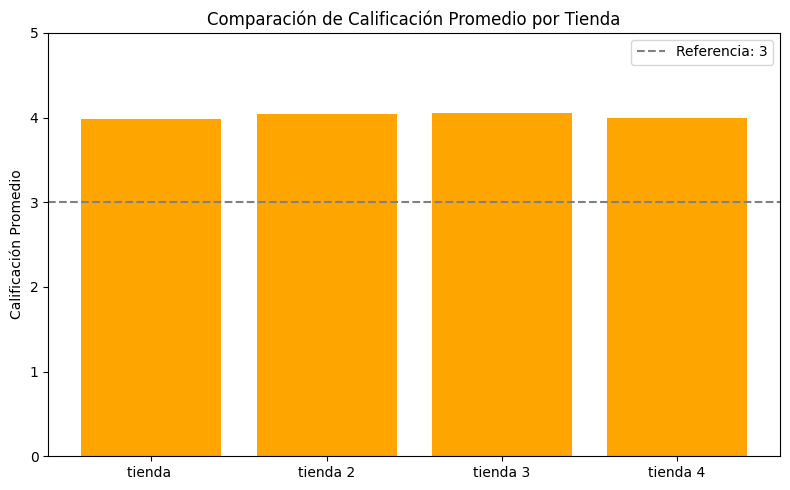

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(df_calificaciones["Tienda"], df_calificaciones["Calificación Promedio"], color='orange')
plt.ylim(0, 5)
plt.ylabel("Calificación Promedio")
plt.title("Comparación de Calificación Promedio por Tienda")
plt.axhline(3, color='gray', linestyle='--', label="Referencia: 3")
plt.legend()
plt.tight_layout()
plt.show()

Para este analisis la "tienda" que tiene mejor promedio de calificacion es:

1.   Tienda 2 con 4.037304
2.   Tienda 3 con 4.048326
3.   Tienda 4 con 3.995759
4.   Tienda 1 con 3.976685

La tienda con mejor calificacion es la tianda 2 y la con peor calificacion es la tienda 1




# 4. Productos más y menos vendidos

Función para obtener los 3 productos mas vendidos y los 3 menos vendidos productos por ventas

In [19]:
def top_bottom_productos(df, nombre_tienda):
    ventas = df.groupby("Producto")["Precio"].sum().reset_index()
    top3 = ventas.sort_values(by="Precio", ascending=False).head(3)
    bottom3 = ventas.sort_values(by="Precio", ascending=True).head(3)
    return top3.assign(Tienda=nombre_tienda, Tipo="Top 3"), bottom3.assign(Tienda=nombre_tienda, Tipo="Bottom 3")

Obtener datos por tienda

In [21]:
top1, bottom1 = top_bottom_productos(tienda, "Tienda 1")
top2, bottom2 = top_bottom_productos(tienda2, "Tienda 2")
top3, bottom3 = top_bottom_productos(tienda3, "Tienda 3")
top4, bottom4 = top_bottom_productos(tienda4, "Tienda 4")

Unir todos

In [23]:
comparativo = pd.concat([top1, bottom1, top2, bottom2, top3, bottom3, top4, bottom4], ignore_index=True)

Mostrar tabla

In [25]:
print("\nComparativo Top y Bottom 3 productos por tienda:")
print(comparativo.sort_values(by=["Tienda", "Tipo", "Precio"], ascending=[True, True, False]))


Comparativo Top y Bottom 3 productos por tienda:
              Producto       Precio    Tienda      Tipo
5      Cubo mágico 8x8     696900.0  Tienda 1  Bottom 3
4       Dinosaurio Rex     688900.0  Tienda 1  Bottom 3
3   Cuerda para saltar     652800.0  Tienda 1  Bottom 3
0        TV LED UHD 4K  142150200.0  Tienda 1     Top 3
1         Refrigerador  112143300.0  Tienda 1     Top 3
2            Iphone 15   97902200.0  Tienda 1     Top 3
11  Cuerda para saltar     856900.0  Tienda 2  Bottom 3
10      Dinosaurio Rex     770300.0  Tienda 2  Bottom 3
9      Cubo mágico 8x8     643600.0  Tienda 2  Bottom 3
6            Iphone 15  113225800.0  Tienda 2     Top 3
7        TV LED UHD 4K  103375000.0  Tienda 2     Top 3
8         Refrigerador   97632500.0  Tienda 2     Top 3
17  Cuerda para saltar     853800.0  Tienda 3  Bottom 3
16      Dinosaurio Rex     795600.0  Tienda 3  Bottom 3
15     Cubo mágico 8x8     640400.0  Tienda 3  Bottom 3
12        Refrigerador   99889700.0  Tienda 3     Top 

Configurar gráfico

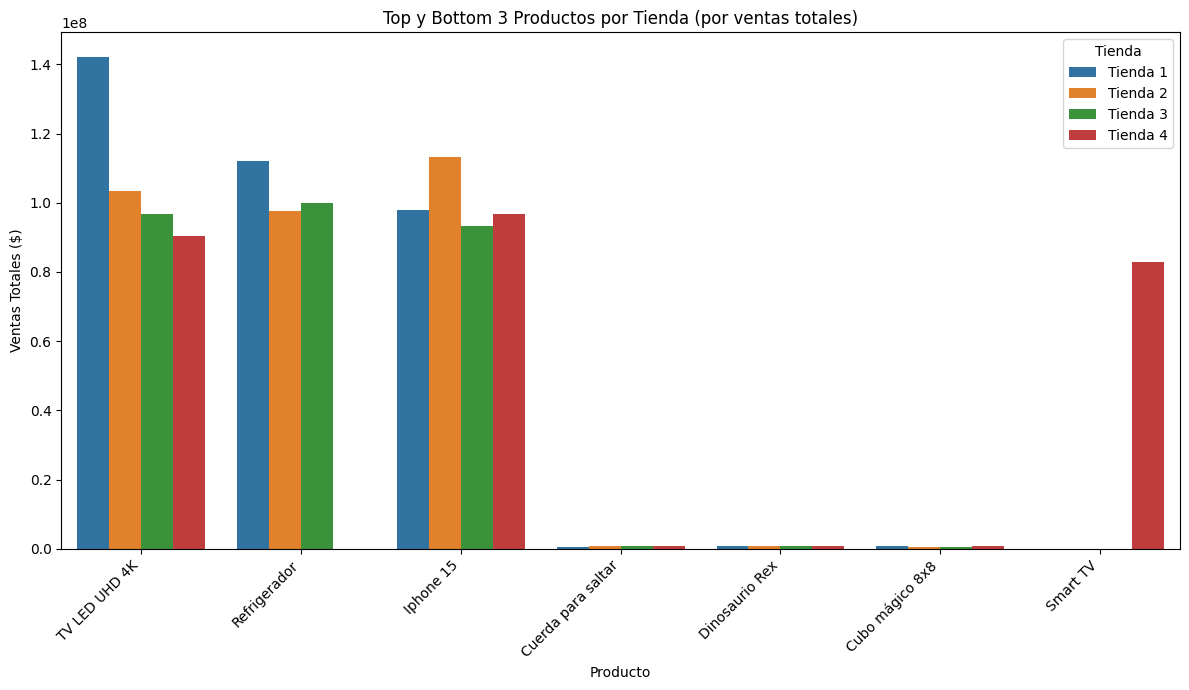

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comparativo, x="Producto", y="Precio", hue="Tienda", dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title("Top y Bottom 3 Productos por Tienda (por ventas totales)")
plt.ylabel("Ventas Totales ($)")
plt.xlabel("Producto")
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda